PageRank_Got


In [1]:
!pip install scipy==1.8.0


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##1 Dataset Analysis and Graph Construction
#Question1

#importer notre datasets 

df1 = pd.read_csv('GOT/book1.csv',sep =',')
df2 = pd.read_csv('GOT/book2.csv',sep =',')
df3 = pd.read_csv('GOT/book3.csv',sep =',')
df4 = pd.read_csv('GOT/book4.csv',sep =',')
df5 = pd.read_csv('GOT/book5.csv',sep =',')

#cleaning

df1.dropna(inplace = True)
df1.drop_duplicates(inplace = True)

df2.dropna(inplace = True)
df2.drop_duplicates(inplace = True)

df3.dropna(inplace = True)
df3.drop_duplicates(inplace = True)

df4.dropna(inplace = True)
df4.drop_duplicates(inplace = True)

df5.dropna(inplace = True)
df5.drop_duplicates(inplace = True)



In [4]:
## df1
#information sur df1

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    object
 1   Target  684 non-null    object
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ KB


In [5]:
df1

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


{('Addam-Marbrand',
  'Jaime-Lannister'): Text(-0.9997178018093109, -0.016796852401220974, '3'),
 ('Addam-Marbrand',
  'Tywin-Lannister'): Text(-0.9988714754581451, -0.03357477759453076, '6'),
 ('Jaime-Lannister',
  'Aerys-II-Targaryen'): Text(-0.9454115629196167, -0.24341779574751854, '5'),
 ('Jaime-Lannister',
  'Barristan-Selmy'): Text(-0.24008193612098694, -0.44410140439867973, '4'),
 ('Jaime-Lannister',
  'Brynden-Tully'): Text(0.00021162629127502441, -0.00839715264737606, '7'),
 ('Jaime-Lannister',
  'Catelyn-Stark'): Text(-0.6284510344266891, -0.4999404363334179, '9'),
 ('Jaime-Lannister',
  'Cersei-Lannister'): Text(-0.6121478602290154, -0.5039923302829266, '16'),
 ('Jaime-Lannister',
  'Eddard-Stark'): Text(-0.9926784038543701, -0.10040203109383583, '27'),
 ('Jaime-Lannister',
  'Edmure-Tully'): Text(-0.000352710485458374, 0.00839250162243843, '4'),
 ('Jaime-Lannister',
  'Galbart-Glover'): Text(-0.5458520539104939, 0.48107026889920235, '3'),
 ('Jaime-Lannister',
  'Gregor-Cle

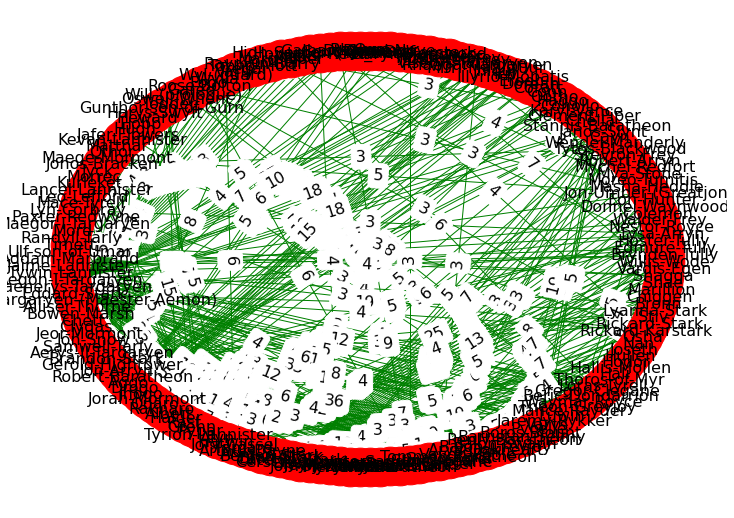

In [6]:
#Question2
G = nx.from_pandas_edgelist(df1,'Source','Target',edge_attr=['weight']) 

pos = nx.shell_layout(G)
weights = nx.get_edge_attributes(G,'weight')
#visualiser graph
plt.figure(figsize=(10,7))
#nx.draw(G,with_labels=True)
nx.draw(G, with_labels = True, pos = pos,node_size = 1500 ,node_color = 'r',edge_color = 'g',arrowsize = 33, font_size =16)
nx.draw_networkx_edge_labels(G , pos , edge_labels = weights , font_size =16)

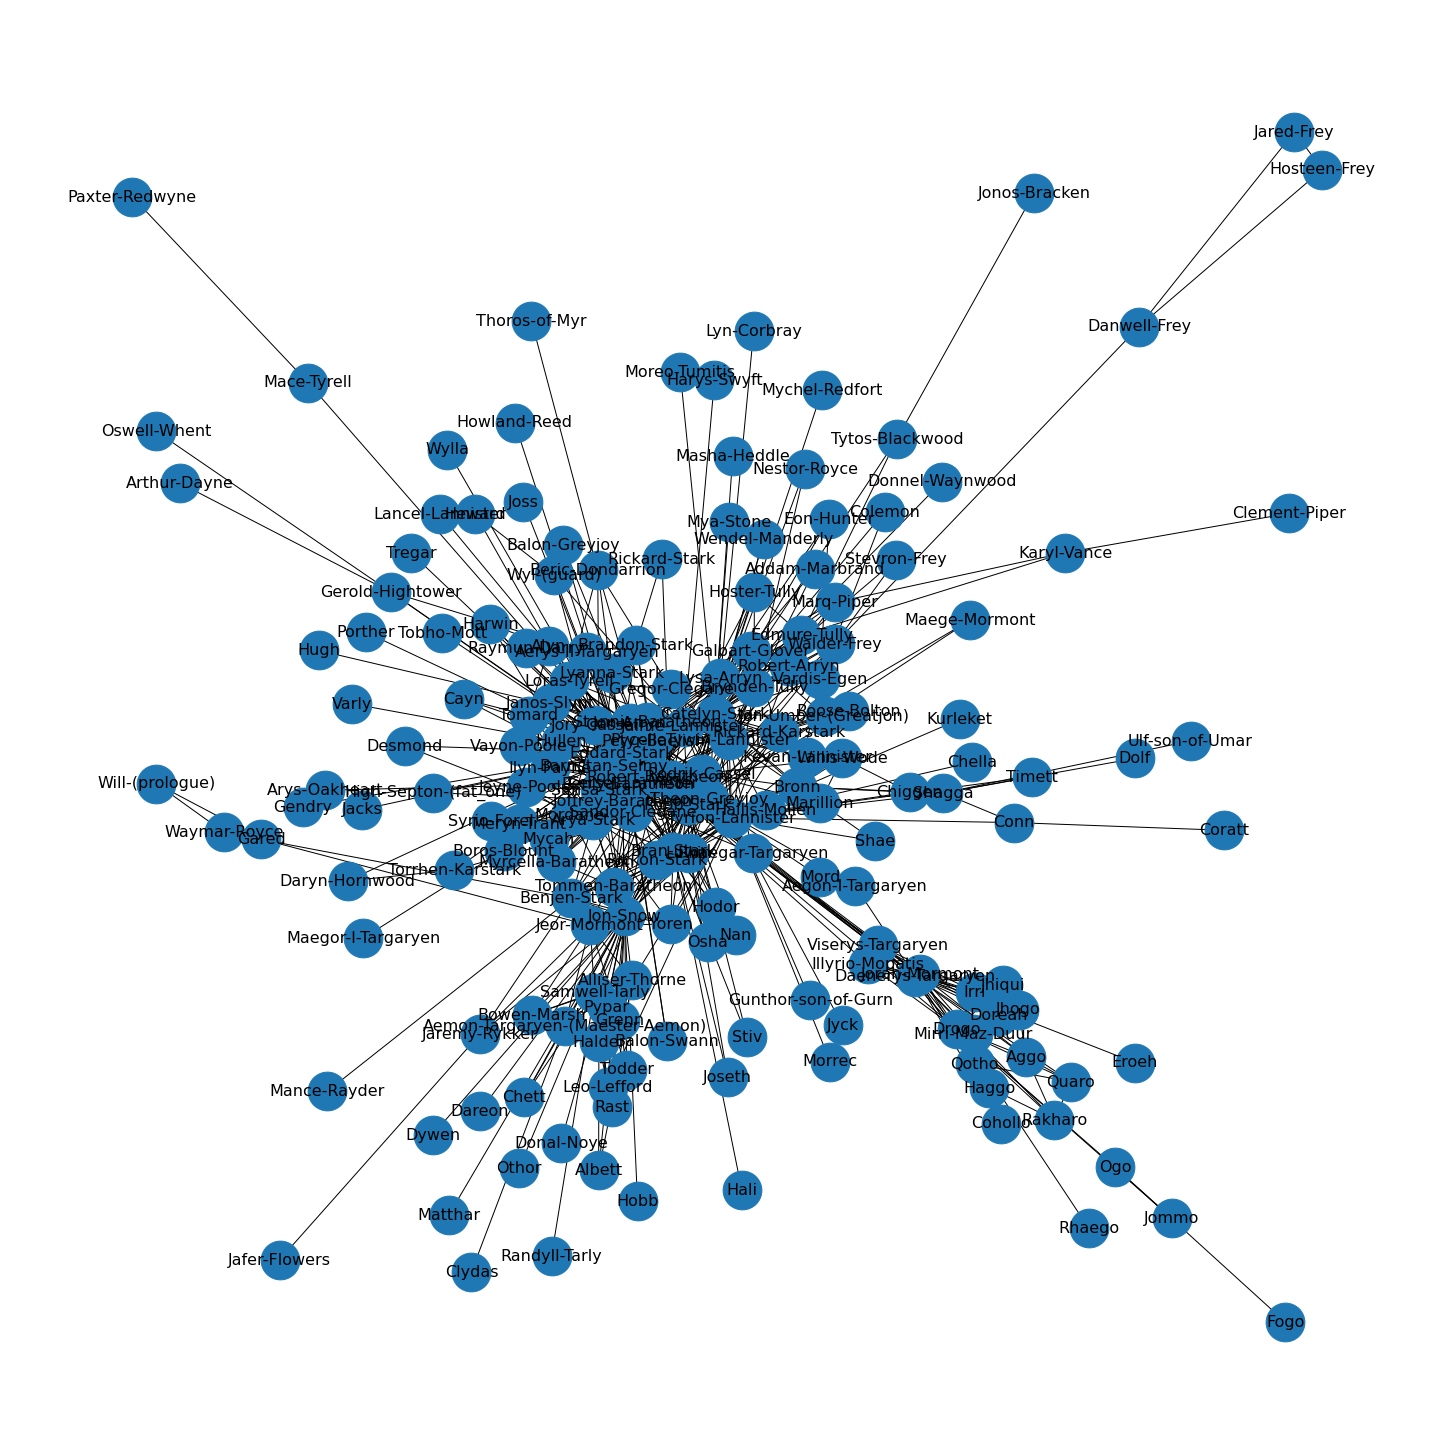

In [7]:
plt.figure(figsize=(20,20))
nx.draw(G,with_labels=True,node_size = 1500 ,arrowsize = 23, font_size =16)

In [8]:
##2 Centrality Analysis
#Question1
degree_centrality_book1 = nx.degree_centrality(G)

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_degree_centrality_book1 =  sorted(degree_centrality_book1, key=lambda x:x[1], reverse=True)[0:5]
sorted_degree_centrality_book1



['Tywin-Lannister', 'Pypar', 'Tyrion-Lannister', 'Mycah', 'Myrcella-Baratheon']

In [9]:
closeness_centrality_book1 = nx.closeness_centrality(G)
# Sorting the dictionaries according to their closeness centrality and storing the top 5
sorted_closeness_centrality_book1 =  sorted(closeness_centrality_book1, key=lambda x:x[1], reverse=True)[0:5]
sorted_closeness_centrality_book1


['Tywin-Lannister', 'Pypar', 'Tyrion-Lannister', 'Mycah', 'Myrcella-Baratheon']

In [10]:
between_centrality_book1 = nx.betweenness_centrality(G,endpoints=False,normalized=True)
# Sorting the dictionaries according to their between centrality and storing the top 5
sorted_between_centrality_book1 =  sorted(between_centrality_book1, key=lambda x:x[1], reverse=True)[0:5]
sorted_between_centrality_book1

['Tywin-Lannister', 'Pypar', 'Tyrion-Lannister', 'Mycah', 'Myrcella-Baratheon']

In [11]:
##3 Page Rank Analysis
#Question1

print(nx.pagerank(G,alpha =0.85))




{'Addam-Marbrand': 0.0012764410388105025, 'Jaime-Lannister': 0.014403331572046032, 'Tywin-Lannister': 0.011424137974783791, 'Aegon-I-Targaryen': 0.0012537195547415083, 'Daenerys-Targaryen': 0.027098612952214246, 'Eddard-Stark': 0.07236162026570049, 'Aemon-Targaryen-(Maester-Aemon)': 0.005811978391627841, 'Alliser-Thorne': 0.005356442137141223, 'Bowen-Marsh': 0.002361050066775156, 'Chett': 0.0019445723764484578, 'Clydas': 0.0011359511512160207, 'Jeor-Mormont': 0.011617948388037938, 'Jon-Snow': 0.04770801150205558, 'Samwell-Tarly': 0.009711599227617523, 'Aerys-II-Targaryen': 0.0030395369712986277, 'Brandon-Stark': 0.003114567362173353, 'Gerold-Hightower': 0.003834801620434246, 'Jon-Arryn': 0.009627000199250479, 'Robert-Baratheon': 0.04849367196106829, 'Aggo': 0.0031232700407977875, 'Drogo': 0.017471303713488304, 'Jhogo': 0.003209383329599847, 'Jorah-Mormont': 0.009229043612874301, 'Quaro': 0.00223600085723908, 'Rakharo': 0.002504720612304428, 'Albett': 0.0014844486231899898, 'Halder': 0.